In [1]:
#Let's import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [4]:
import datetime

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Data Sourcing:
#read the dataset:

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#change the index_col

bike = pd.read_csv('day.csv',index_col='instant')
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# check null values:

bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [9]:
# no null values in dataset

In [10]:
#check shape of the dataset

bike.shape

(730, 15)

In [11]:
# lets check describe of numerical variables

bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
#let's check date column:

bike.dteday.describe()

count            730
unique           730
top       01-06-2018
freq               1
Name: dteday, dtype: object

In [13]:
bike['dteday']=bike['dteday'].apply(lambda x : x.split('-')[0])

In [14]:
#drop dteday
bike = bike.rename(columns={"dteday": "date"})
bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


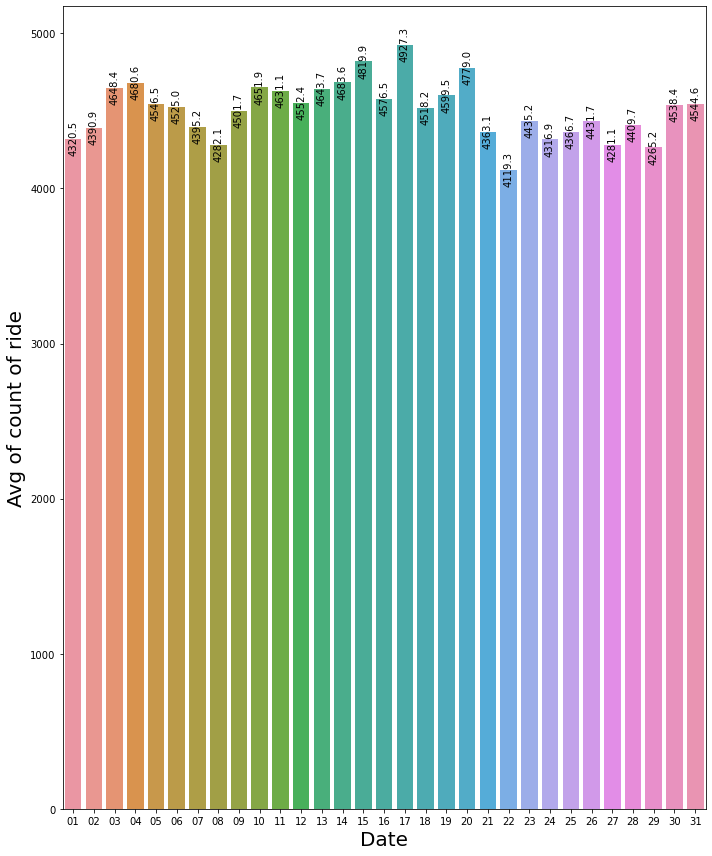

In [15]:
#lets plot the mean distribution of rides on each date:

date_mean = bike.groupby(by='date').cnt.mean()
plt.figure(figsize=(10,12))
ax1=sns.barplot(x=date_mean.index,y=date_mean.values)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',  rotation='vertical',
                   xytext = (0, 1), 
                   textcoords = 'offset points')
    

plt.xlabel('Date',fontsize=20)
plt.ylabel('Avg of count of ride',fontsize=20)
plt.tight_layout();

In [16]:
# All the date and month ranges are valid in the data set
# We hav extracted dates from dteday column
# we made barplot on date and mean count of raids on particular date
# we found no significant difference 
# no linear relation found in Date 

In [17]:
bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
# let's check season column

bike.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [19]:
# season column is varied between 1 to 4 
# season column is categorical column 
# we need to map these numbers to respective season names, 
# we need to generate further dummy variables, as it is a  Categorical Nomuial Type Data


In [20]:
# we should map these columns as follows :
#1.spring
#2.summer
#3.fall
#4.winter

In [21]:
# let's map these season columns:

bike['season'] = bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [22]:
#lets check the dataset:

bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
#Lets check season column where their is signficant 

season_check = bike.groupby(by='season').cnt.mean().sort_values()
season_check.head()

season
spring    2608.411111
winter    4728.162921
summer    4992.331522
fall      5644.303191
Name: cnt, dtype: float64

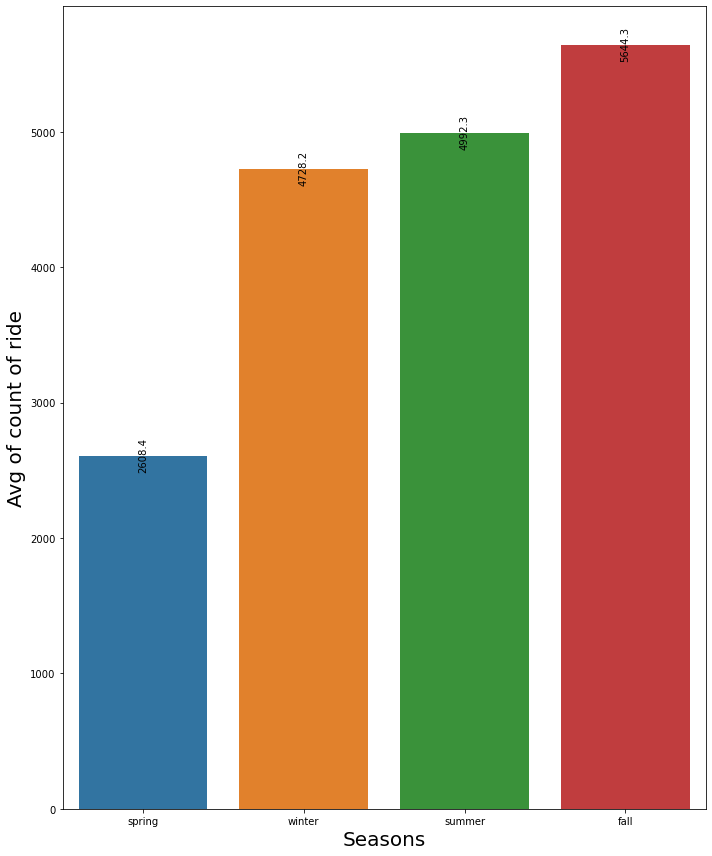

In [24]:
# lets plot distplot

plt.figure(figsize=(10,12))
ax1=sns.barplot(x=season_check.index,y=season_check.values)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',  rotation='vertical',
                   xytext = (0, 1), 
                   textcoords = 'offset points')
plt.xlabel('Seasons',fontsize=20)
plt.ylabel('Avg of count of ride',fontsize=20)
plt.tight_layout();

In [25]:
# there is quite different in each season,
# fall has highest of the among

In [26]:
# Lets check the data set:

bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [27]:
bike.yr.describe()

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

In [28]:
# year column has 0 and 1 
# year consists of 2 values , 0 represents 2018 and 1 represents 2019
# lets make distplot on year column, we can get to know the distribution of rides on different years


In [29]:
year_dist = bike.groupby(by='yr').cnt.mean()
year_dist

yr
0    3405.761644
1    5610.252055
Name: cnt, dtype: float64

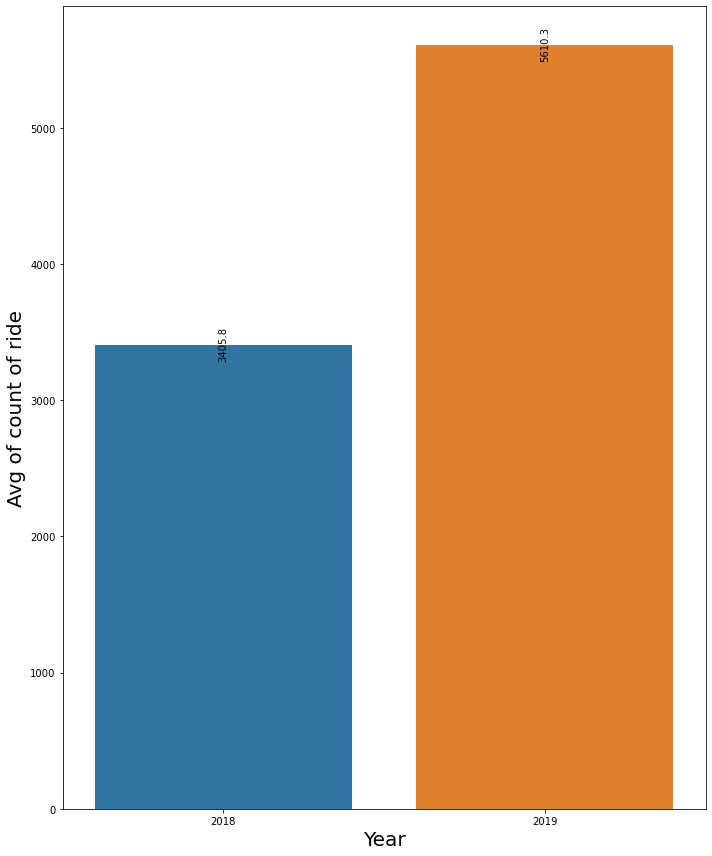

In [30]:
#plot distribution on Year column :


plt.figure(figsize=(10,12))
ax1=sns.barplot(x=year_dist.index,y=year_dist.values)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',  rotation='vertical',
                   xytext = (0, 1), 
                   textcoords = 'offset points')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Avg of count of ride',fontsize=20)
ax1.set_xticklabels([2018,2019])
plt.tight_layout();

In [31]:

# We can see that year 2019 has significant high compared to year 2018

In [32]:
#Let's check Month column:

month_mean = bike.groupby(by='mnth').cnt.mean()
month_mean.head()

mnth
1    2176.338710
2    2669.964286
3    3692.258065
4    4484.900000
5    5349.774194
Name: cnt, dtype: float64

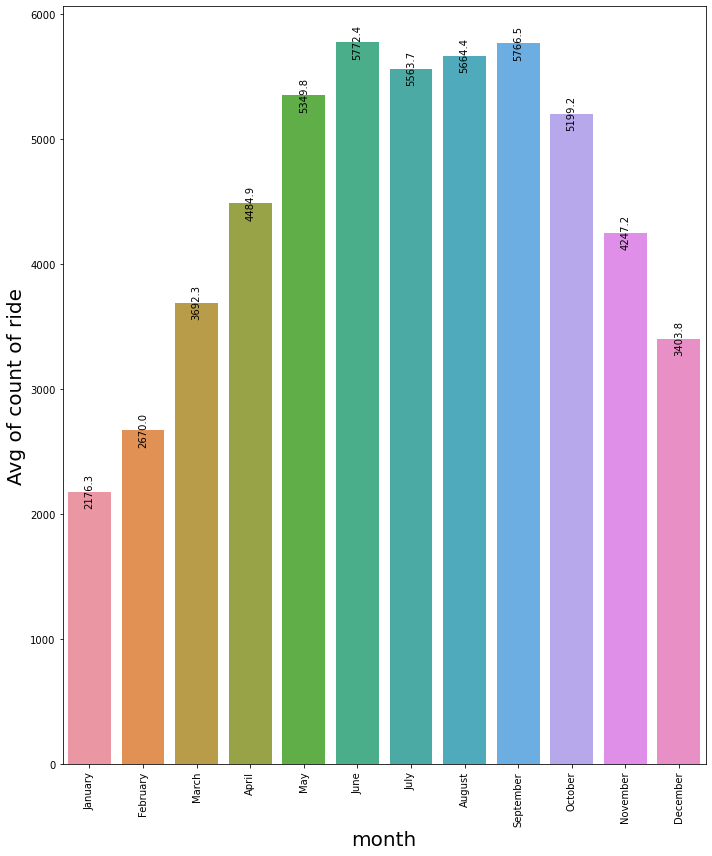

In [33]:
#plot distribution on monts:

plt.figure(figsize=(10,12))
ax1=sns.barplot(x=month_mean.index,y=month_mean.values)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',  rotation='vertical',
                   xytext = (0, 1), 
                   textcoords = 'offset points')
ax1.set_xticklabels(["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.xticks(rotation=90)
plt.xlabel('month',fontsize=20)
plt.ylabel('Avg of count of ride',fontsize=20)
plt.tight_layout();

In [34]:
bike['mnth']=bike.mnth.map({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})


In [35]:
# we can clearly see that, there is drastical change in ride count from May to October
# which are summer and fall seasons in US


In [36]:
#Let's check Holiday 

bike.holiday.describe()

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

In [37]:
holiday_mean = bike.groupby(by='holiday').cnt.mean()

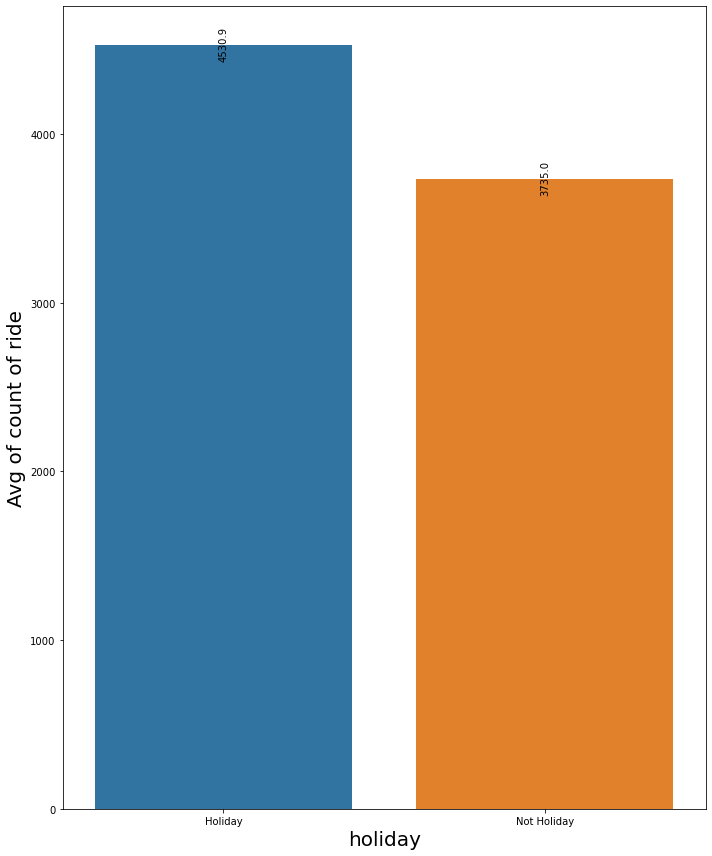

In [38]:
# plot distribution of rides on Holiday column

plt.figure(figsize=(10,12))
ax1=sns.barplot(x=holiday_mean.index,y=holiday_mean.values)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',  rotation='vertical',
                   xytext = (0, 1), 
                   textcoords = 'offset points')
ax1.set_xticklabels(['Holiday', 'Not Holiday'])
plt.xlabel('holiday',fontsize=20)
plt.ylabel('Avg of count of ride',fontsize=20)
plt.tight_layout();

In [39]:
#Lets check Weekday:

bike.weekday.describe()

count    730.000000
mean       2.995890
std        2.000339
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [40]:
weekday_mean = bike.groupby(by='weekday').cnt.mean()

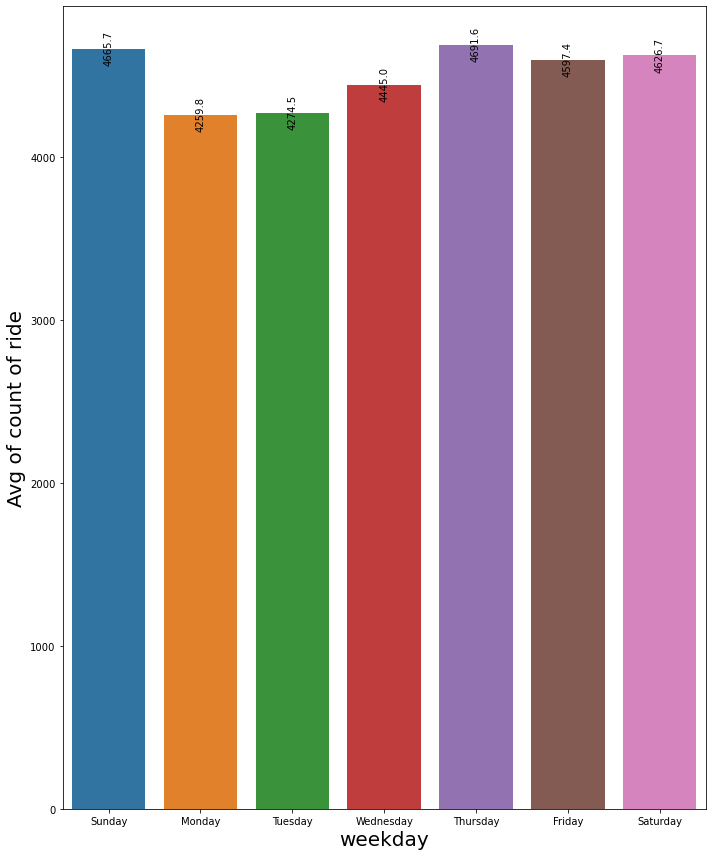

In [41]:
#lets plot on weekday and count of rides

plt.figure(figsize=(10,12))
ax1=sns.barplot(x=weekday_mean.index,y=weekday_mean.values)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',  rotation='vertical',
                   xytext = (0, 1), 
                   textcoords = 'offset points')
ax1.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('weekday',fontsize=20)
plt.ylabel('Avg of count of ride',fontsize=20)
plt.tight_layout();

In [42]:
# thers is no significant diff in weekdays, all r performing well


In [43]:
# lets map the weekday values into respective weekday name
# values of {0,1,2,3,4,5,6,7}:'sunday','monday','tuesday','wednesday','thursday','friday','saturday'

bike['weekday']=bike.weekday.map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})


In [44]:
bike.groupby(by='weekday').weekday.count()

weekday
friday       104
monday       105
saturday     104
sunday       104
thursday     104
tuesday      105
wednesday    104
Name: weekday, dtype: int64

In [45]:
# let's check Working Day

bike.workingday.describe()

count    730.000000
mean       0.690411
std        0.462641
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

In [46]:
# workingday have two values 0 and 1

In [47]:
# lets count no. of working days:

bike.groupby(by='workingday').workingday.count()

workingday
0    226
1    504
Name: workingday, dtype: int64

In [48]:
workingdays_mean = bike.groupby(by='workingday').cnt.mean()

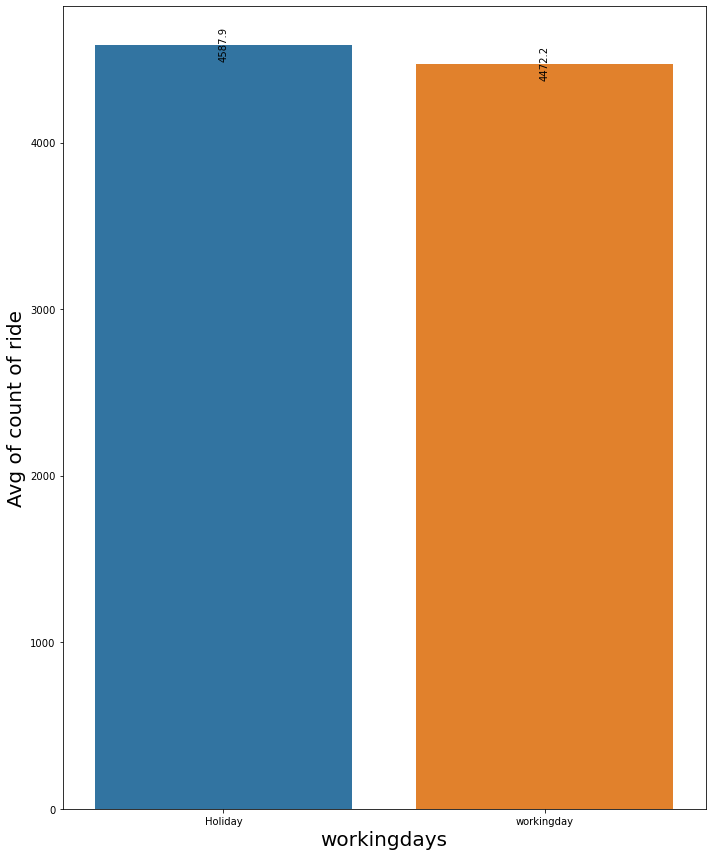

In [49]:
# lets plot  workingdays on count of rides:

plt.figure(figsize=(10,12))
ax1=sns.barplot(x=workingdays_mean.index,y=workingdays_mean.values)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',  rotation='vertical',
                   xytext = (0, 1), 
                   textcoords = 'offset points')
ax1.set_xticklabels(['Holiday','workingday'])
plt.xlabel('workingdays',fontsize=20)
plt.ylabel('Avg of count of ride',fontsize=20)
plt.tight_layout();

In [50]:
# lets analysis on weathersit:

bike.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [51]:
bike.groupby(by='weathersit').weathersit.count()

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

In [52]:
#lets plot distribution of Ride count on weathersit

weathersit_mean = bike.groupby(by='weathersit').cnt.mean()


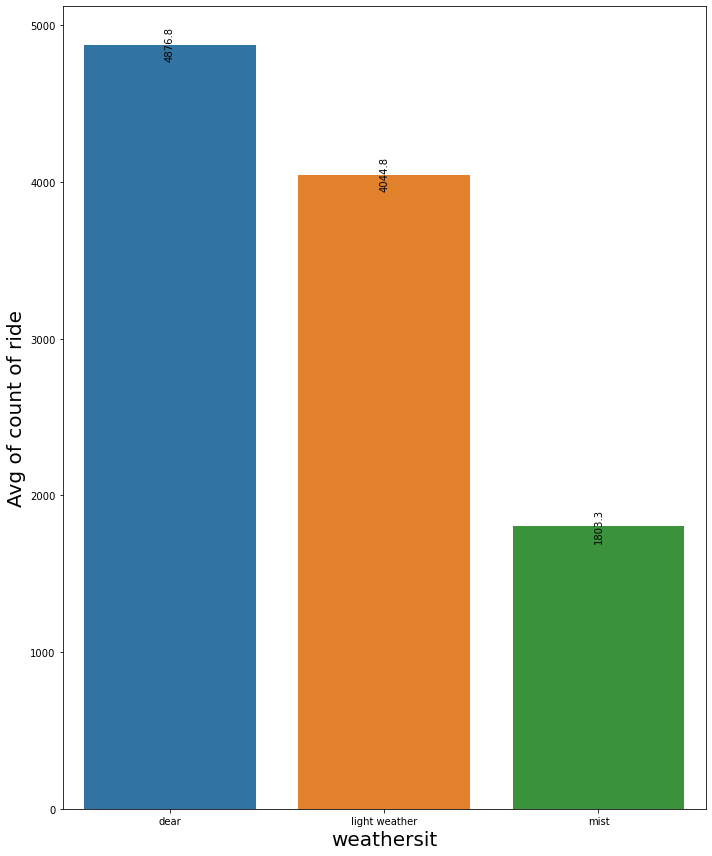

In [53]:
plt.figure(figsize=(10,12))
ax1=sns.barplot(x=weathersit_mean.index,y=weathersit_mean.values)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',  rotation='vertical',
                   xytext = (0, 1), 
                   textcoords = 'offset points')
ax1.set_xticklabels(['dear','light weather','mist'])
plt.xlabel('weathersit',fontsize=20)
plt.ylabel('Avg of count of ride',fontsize=20)
plt.tight_layout();

In [54]:
#Temperature and Adjusted Temperature:
# check correlation btw temp and atemp

np.corrcoef(bike['temp'],bike['atemp'])

array([[1.        , 0.99169618],
       [0.99169618, 1.        ]])

In [55]:
temp_var=['Temperature','Adjusted Temperature']
pd.DataFrame(np.corrcoef(bike['temp'],bike['atemp']),columns=temp_var,index=temp_var)

,Temperature,Adjusted Temperature
Temperature,1.000000,0.991696
Adjusted Temperature,0.991696,1.000000


In [56]:
#drop adjusted temperatue, the temp and atemp correlated highly, it explains same

bike = bike.drop(columns=['atemp'],axis=1)

In [57]:
# anlaysis on temp :

bike['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

Text(0.5, 1.0, 'Temperature')

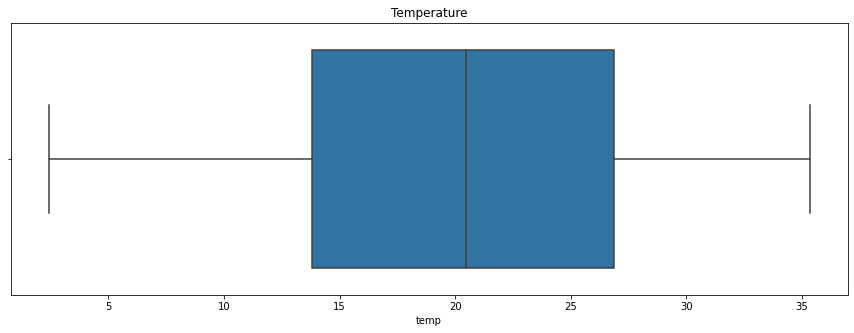

In [58]:
# is temp column is valid or not:
plt.figure(figsize=(15,5))
sns.boxplot(data=bike,x='temp')
plt.title('Temperature')


In [59]:
#Temperature column is valid, we can proceed ahead with out dropping this column

In [60]:
#Let's check on Humidity:

bike.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

Text(0.5, 1.0, 'Humidity')

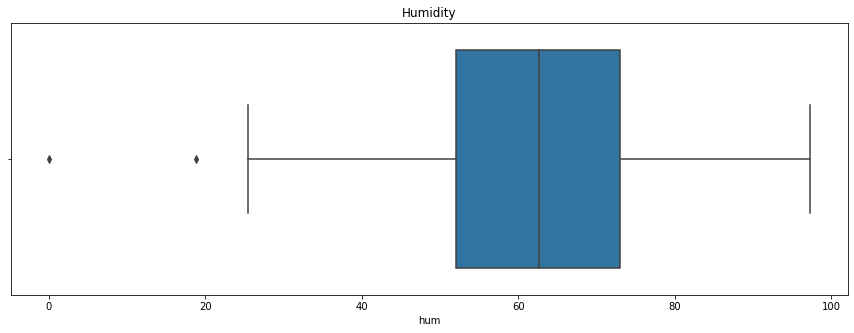

In [61]:
# Lets check is it valid or not:
plt.figure(figsize=(15,5))
sns.boxplot(data=bike,x='hum')
plt.title('Humidity')

In [62]:
# lets change humidity value = 0:

mean_value = bike.hum.mean()

In [63]:
mean_value

62.76517493150685

In [64]:
bike.at[int(bike[bike['hum']==0.0].hum.index.values),"hum"]=mean_value

In [65]:
#validating is the 0 value present in hum:

bike[bike['hum']==0.0]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,


In [66]:
# Wind speed column:

bike.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

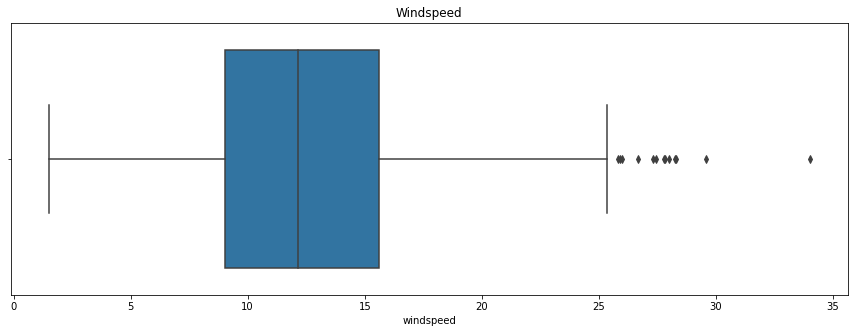

In [67]:
plt.figure(figsize=(15,5))
plt.title('Windspeed')
sns.boxplot(data=bike,x='windspeed')

In [68]:
# we cannot drop this column,it has valid range

In [69]:
# Casual, Registered and Cnt column:

#lets drop the casual and registered 
# our aim is to predict final count

bike=bike.drop(columns=['casual','registered'],axis=1)

In [70]:
#lets check data set:

bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,01,spring,0,January,0,monday,1,2,14.110847,80.5833,10.749882,985
2,02,spring,0,January,0,tuesday,1,2,14.902598,69.6087,16.652113,801
3,03,spring,0,January,0,wednesday,1,1,8.050924,43.7273,16.636703,1349
4,04,spring,0,January,0,thursday,1,1,8.200000,59.0435,10.739832,1562
5,05,spring,0,January,0,friday,1,1,9.305237,43.6957,12.522300,1600


In [71]:
# Pair-Plot:
# We will plot a pair plot on entire dataset
# we already made changes in dataset, we changed to categorical.
# lets import again the data set and make necessary changes and plot it

pair_plot  = pd.read_csv('day.csv',index_col='instant')
pair_plot = pair_plot.drop(columns=['casual','registered','atemp'],axis=1)
pair_plot['dteday']= pair_plot['dteday'].apply(lambda x :int(x.split('-')[0]))
pair_plot = pair_plot.rename(columns={'dteday':'date'})
pair_plot.at[int(pair_plot[pair_plot['hum'] == 0.0].hum.index.values), "hum"] = mean_value

In [72]:
pair_plot.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
2,2,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
3,3,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
4,4,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
5,5,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


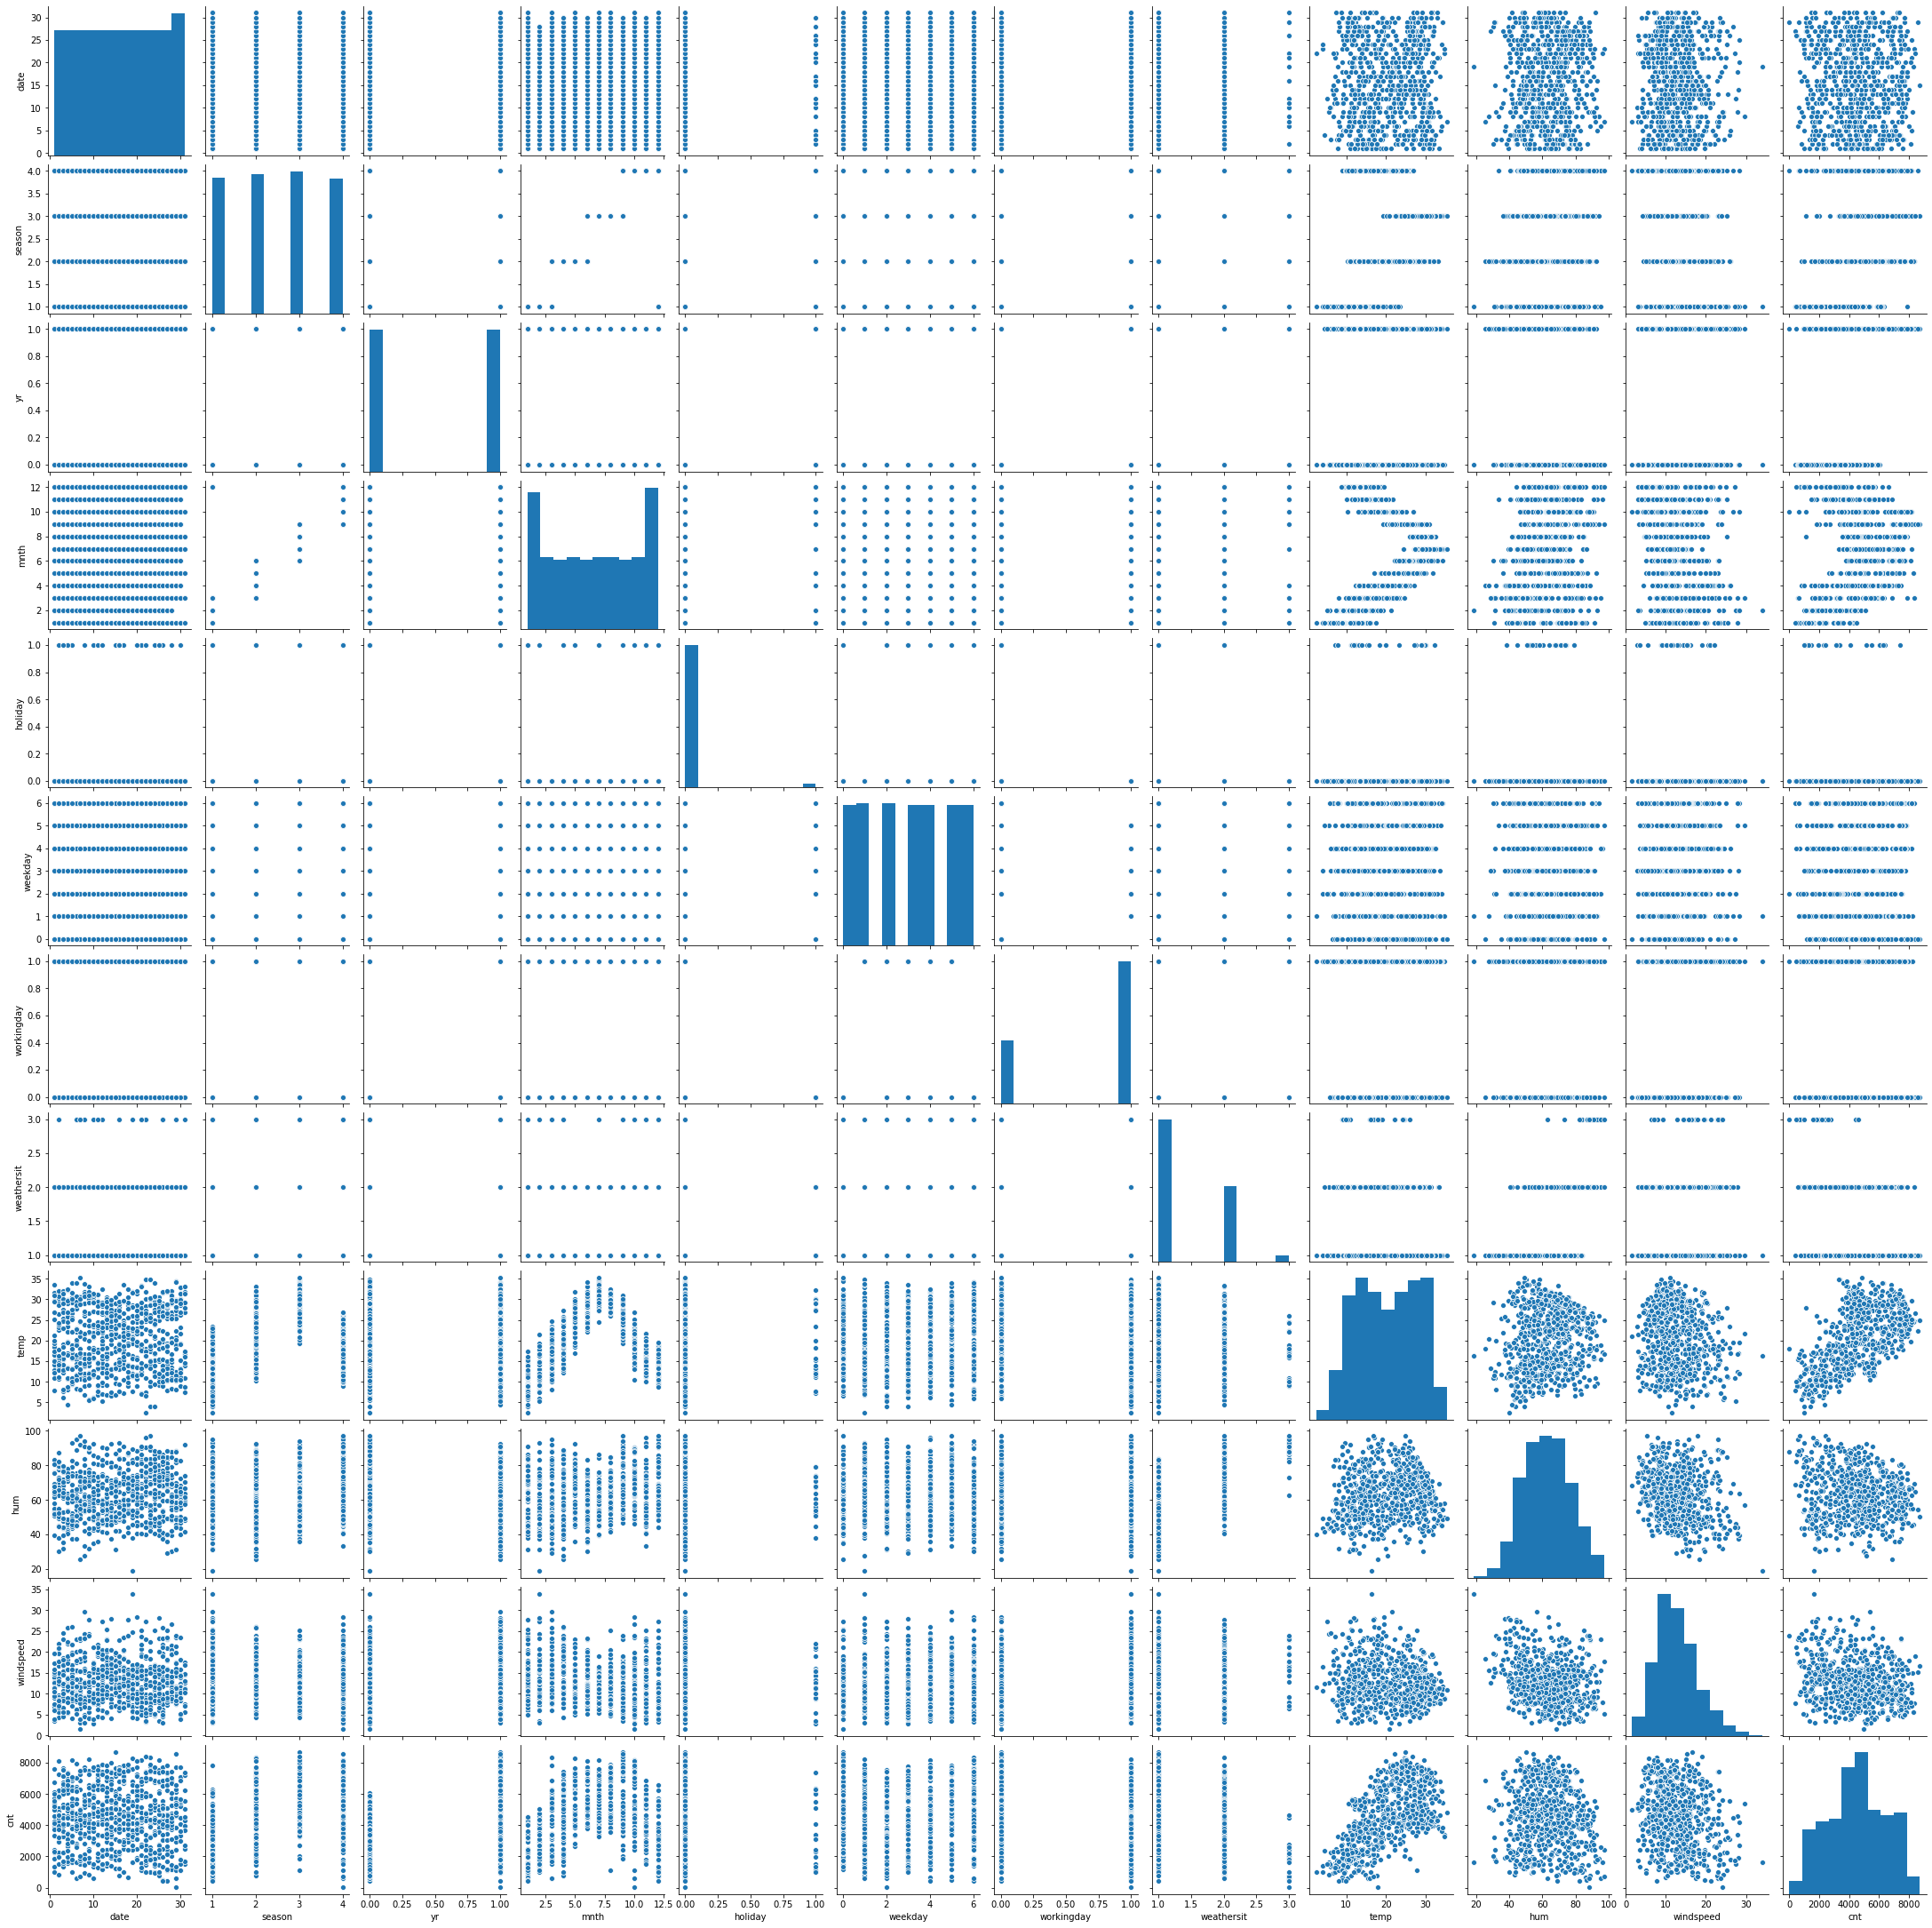

In [73]:
sns.pairplot(pair_plot)

In [74]:
 # the following assumptions that can made up from the pairplot with respect to Count as Target variable:
    
    # date column seems all the values are scattered evenly across all the points.
    # in season column, fall has maximum number of rides, followed by summer,spring and winter
    # ride count seem drastically increase in year 2019 when compared to 2018
    # in month column, ride count seems to increase between May to October
    # ride count seems less in holiday compared to other days
    # working and non working day seems same in count of rides
    # ride count is more mist and clear
    # ride count is linear dependent to temp
    # humidity seems all the values are scattered randomly, no linear relation
    # windspeed seems all the values are scattered randomly, no linear relation

In [75]:
# Data Transformation:

# following columns are categorical Nomianl Variables
# we need to encode these variables before making model
# first, create dummy variables

dummy_variables = ['mnth','season','weekday','weathersit']
status = pd.get_dummies(bike[dummy_variables],drop_first=True)
status.head()


,weathersit,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,...,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [76]:
bike = pd.concat([bike,status],axis=1)
bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,...,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,01,spring,0,January,0,monday,1,2,14.110847,80.5833,...,0,1,0,0,1,0,0,0,0,0
2,02,spring,0,January,0,tuesday,1,2,14.902598,69.6087,...,0,1,0,0,0,0,0,0,1,0
3,03,spring,0,January,0,wednesday,1,1,8.050924,43.7273,...,0,1,0,0,0,0,0,0,0,1
4,04,spring,0,January,0,thursday,1,1,8.200000,59.0435,...,0,1,0,0,0,0,0,1,0,0
5,05,spring,0,January,0,friday,1,1,9.305237,43.6957,...,0,1,0,0,0,0,0,0,0,0


In [77]:
#drop columns:

bike = bike.drop(columns=dummy_variables)

In [78]:

bike.head()

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,01,0,0,1,14.110847,80.5833,10.749882,985,0,0,...,0,1,0,0,1,0,0,0,0,0
2,02,0,0,1,14.902598,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,0,0,1,0
3,03,0,0,1,8.050924,43.7273,16.636703,1349,0,0,...,0,1,0,0,0,0,0,0,0,1
4,04,0,0,1,8.200000,59.0435,10.739832,1562,0,0,...,0,1,0,0,0,0,0,1,0,0
5,05,0,0,1,9.305237,43.6957,12.522300,1600,0,0,...,0,1,0,0,0,0,0,0,0,0


In [79]:
# Data Splitting:

# here, we gonna split the data into train data(70%) and test data(30%)

df_train, df_test = train_test_split(bike, train_size=0.70, random_state=100)

In [80]:
df_train.shape

(510, 28)

In [81]:
df_test.shape

(220, 28)

In [82]:
# Data Transformation 
# Normalising the data set
# following columns are numerical, we needs to be Normalised

numerical_variables = ['date','temp','windspeed','cnt']


In [83]:
scaler = MinMaxScaler()

In [84]:
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])


In [85]:
df_train.head()

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
instant,,,,,,,,,,,,,,,,,,,,,
577,1.000000,1,0,1,0.815169,70.4167,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
427,0.066667,1,0,0,0.442393,62.1250,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,0,0,0
729,0.966667,1,0,1,0.245101,48.3333,0.663106,0.204096,0,1,...,0,1,0,0,1,0,0,0,0,0
483,0.900000,1,0,0,0.395666,48.9583,0.188475,0.482973,0,0,...,0,0,1,0,0,0,1,0,0,0
112,0.700000,0,0,0,0.345824,72.9583,0.380981,0.191095,0,0,...,0,0,1,0,0,0,1,0,0,0


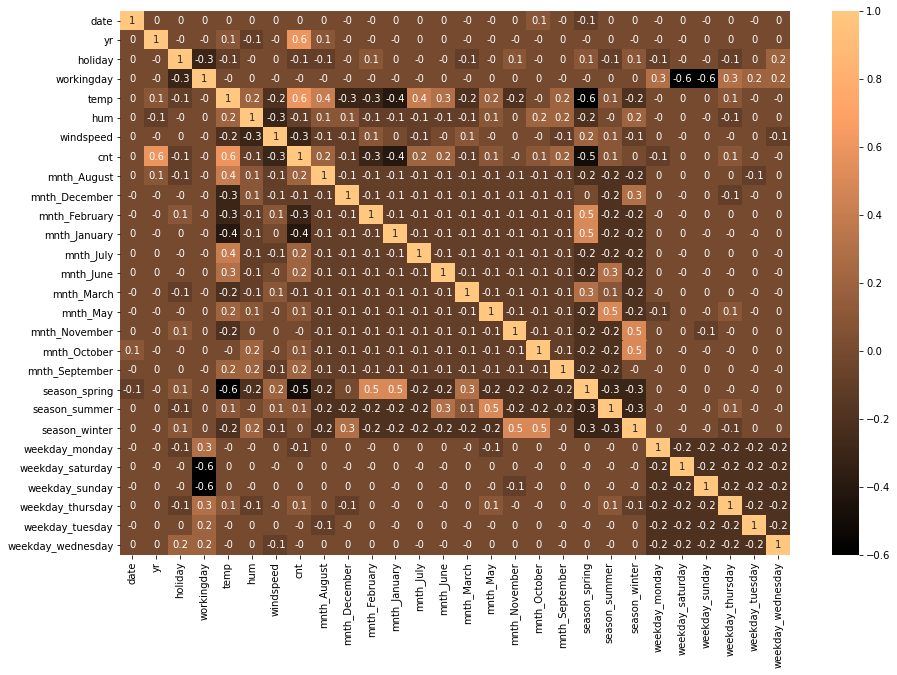

In [86]:
# Lets find correlation-co-efficent:

plt.figure(figsize=(15,10))
sns.heatmap(round(df_train.corr(),1),annot=True,cmap='copper');

In [87]:
# no variable is highly correlated with other variable

In [88]:
# trained target variable 'cnt':

y_train = df_train.pop('cnt')

In [89]:
# trained predictor varibles:

X_train = df_train
X_train.columns

Index(['date', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_August', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_October', 'mnth_September', 'season_spring', 'season_summer',
       'season_winter', 'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

In [90]:
# RFE Application:

lm=LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [91]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('date', False, 11),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', False, 8),
 ('windspeed', True, 1),
 ('mnth_August', False, 5),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 10),
 ('mnth_May', False, 6),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_monday', False, 3),
 ('weekday_saturday', False, 7),
 ('weekday_sunday', True, 1),
 ('weekday_thursday', True, 1),
 ('weekday_tuesday', False, 2),
 ('weekday_wednesday', False, 9)]

In [92]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
11,mnth_July,True,1
17,mnth_September,True,1
23,weekday_sunday,True,1
15,mnth_November,True,1
24,weekday_thursday,True,1
10,mnth_January,True,1
18,season_spring,True,1
8,mnth_December,True,1
9,mnth_February,True,1
6,windspeed,True,1


In [93]:
#RFE method has evaluated top 15 predictors which will impact our outcome


In [94]:
# Model Building 1:

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     115.8
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          8.03e-151
Time:                        18:54:05   Log-Likelihood:                 423.32
No. Observations:                 510   AIC:                            -814.6
Df Residuals:                     494   BIC:                            -746.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1871      0.039      4.856      0.000       0.111       0.263
yr                   0.2394      0.010     24.955      0.000       0.221       0.258
holiday             -0.0638      0.031     -2.079      0.038      -0.124      -0.004
temp                 0.4682      0.044     10.666      0.000       0.382       0.554
windspeed           -0.1795      0.030     -6.073      0.000      -0.238      -0.121
mnth_December       -0.0322      0.022     -1.476      0.141      -0.075       0.011
mnth_February       -0.0366      0.026     -1.409      0.159      -0.088       0.014
mnth_January        -0.0643      0.026     -2.511      0.012      -0.115      -0.014
mnth_July           -0.0446      0.022     -2.055      0.040      -0.087      -0.002
mnth_November       -0.0215      0.023     -0.947      0.344      -0.066       0.023
mnth_September       0.0549      0.020      2.730      0.007       0.015       0.094
season_spring       -0.0440      0.026     -1.676      0.094      -0.096       0.008
season_summer        0.0358      0.018      1.953      0.051      -0.000       0.072
season_winter        0.0722      0.021      3.418      0.001       0.031       0.114
weekday_sunday       0.0242      0.014      1.721      0.086      -0.003       0.052
weekday_thursday     0.0332      0.014      2.395      0.017       0.006       0.061
==============================================================================
Omnibus:                      119.193   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.374
Skew:                          -1.139   Prob(JB):                     9.94e-71
Kurtosis:                       6.159   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# lets check Variance Inflation Factor:

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.23
3,windspeed,4.62
10,season_spring,4.31
12,season_winter,2.90
11,season_summer,2.21
6,mnth_January,2.19
0,yr,2.07
5,mnth_February,1.88
8,mnth_November,1.82
7,mnth_July,1.59


In [96]:
# in the model 1, we see that P-Value of "mnth_November" is more than 0.05 ,which makes it insignificant
# So, lets drop that from the model
# designing the model again 


In [97]:
# Model Building 2:
col = col.drop(['mnth_November'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     124.0
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          1.10e-151
Time:                        18:54:05   Log-Likelihood:                 422.86
No. Observations:                 510   AIC:                            -815.7
Df Residuals:                     495   BIC:                            -752.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1772      0.037      4.779      0.000       0.104       0.250
yr                   0.2392      0.010     24.944      0.000       0.220       0.258
holiday             -0.0676      0.030     -2.223      0.027      -0.127      -0.008
temp                 0.4799      0.042     11.398      0.000       0.397       0.563
windspeed           -0.1796      0.030     -6.080      0.000      -0.238      -0.122
mnth_December       -0.0236      0.020     -1.190      0.234      -0.063       0.015
mnth_February       -0.0328      0.026     -1.279      0.202      -0.083       0.018
mnth_January        -0.0597      0.025     -2.376      0.018      -0.109      -0.010
mnth_July           -0.0447      0.022     -2.058      0.040      -0.087      -0.002
mnth_September       0.0580      0.020      2.927      0.004       0.019       0.097
season_spring       -0.0408      0.026     -1.568      0.117      -0.092       0.010
season_summer        0.0391      0.018      2.168      0.031       0.004       0.074
season_winter        0.0674      0.021      3.287      0.001       0.027       0.108
weekday_sunday       0.0246      0.014      1.756      0.080      -0.003       0.052
weekday_thursday     0.0330      0.014      2.381      0.018       0.006       0.060
==============================================================================
Omnibus:                      112.911   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.068
Skew:                          -1.100   Prob(JB):                     1.03e-63
Kurtosis:                       5.969   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.20
3,windspeed,4.57
9,season_spring,4.29
10,season_summer,2.21
6,mnth_January,2.17
0,yr,2.07
11,season_winter,2.00
5,mnth_February,1.87
7,mnth_July,1.59
4,mnth_December,1.36


In [99]:
# in the model 2, we see that P-Value of "mnth_December" is more than 0.05 ,which makes it insignificant
# So, lets drop that from the model
# designing the model again 


In [100]:
# Model Building 3:

col = col.drop(['mnth_December'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     133.3
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          1.89e-152
Time:                        18:54:05   Log-Likelihood:                 422.13
No. Observations:                 510   AIC:                            -816.3
Df Residuals:                     496   BIC:                            -757.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1649      0.036      4.629      0.000       0.095       0.235
yr                   0.2391      0.010     24.923      0.000       0.220       0.258
holiday             -0.0669      0.030     -2.199      0.028      -0.127      -0.007
temp                 0.4936      0.041     12.177      0.000       0.414       0.573
windspeed           -0.1755      0.029     -5.979      0.000      -0.233      -0.118
mnth_February       -0.0247      0.025     -1.000      0.318      -0.073       0.024
mnth_January        -0.0503      0.024     -2.106      0.036      -0.097      -0.003
mnth_July           -0.0452      0.022     -2.081      0.038      -0.088      -0.003
mnth_September       0.0600      0.020      3.034      0.003       0.021       0.099
season_spring       -0.0422      0.026     -1.622      0.106      -0.093       0.009
season_summer        0.0419      0.018      2.345      0.019       0.007       0.077
season_winter        0.0667      0.021      3.252      0.001       0.026       0.107
weekday_sunday       0.0239      0.014      1.704      0.089      -0.004       0.051
weekday_thursday     0.0338      0.014      2.436      0.015       0.007       0.061
==============================================================================
Omnibus:                      109.572   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.063
Skew:                          -1.077   Prob(JB):                     1.87e-60
Kurtosis:                       5.882   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,4.57
8,season_spring,3.90
9,season_summer,2.21
0,yr,2.07
5,mnth_January,2.04
4,mnth_February,1.78
10,season_winter,1.71
6,mnth_July,1.59
7,mnth_September,1.33


In [102]:
# in the model 3, we see that P-Value of "mnth_February" is more than 0.05 ,which makes it insignificant
# So, lets drop that from the model
# designing the model again 


In [103]:
# Model Building 4:

col = col.drop(['mnth_February'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     144.4
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          2.53e-153
Time:                        18:54:06   Log-Likelihood:                 421.62
No. Observations:                 510   AIC:                            -817.2
Df Residuals:                     497   BIC:                            -762.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1599      0.035      4.534      0.000       0.091       0.229
yr                   0.2389      0.010     24.908      0.000       0.220       0.258
holiday             -0.0684      0.030     -2.251      0.025      -0.128      -0.009
temp                 0.5001      0.040     12.504      0.000       0.422       0.579
windspeed           -0.1752      0.029     -5.968      0.000      -0.233      -0.118
mnth_January        -0.0387      0.021     -1.854      0.064      -0.080       0.002
mnth_July           -0.0457      0.022     -2.107      0.036      -0.088      -0.003
mnth_September       0.0601      0.020      3.041      0.002       0.021       0.099
season_spring       -0.0500      0.025     -2.016      0.044      -0.099      -0.001
season_summer        0.0431      0.018      2.420      0.016       0.008       0.078
season_winter        0.0688      0.020      3.376      0.001       0.029       0.109
weekday_sunday       0.0239      0.014      1.703      0.089      -0.004       0.051
weekday_thursday     0.0330      0.014      2.384      0.017       0.006       0.060
==============================================================================
Omnibus:                      107.992   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.980
Skew:                          -1.063   Prob(JB):                     2.37e-59
Kurtosis:                       5.861   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# in the model 4, we see that P-Value of "weekday_sunday" is more than 0.05 ,which makes it insignificant
# So, lets drop that from the model
# designing the model again 


In [105]:
# Model Building 5:

col = col.drop(['weekday_sunday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     156.6
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          8.30e-154
Time:                        18:54:06   Log-Likelihood:                 420.14
No. Observations:                 510   AIC:                            -816.3
Df Residuals:                     498   BIC:                            -765.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1647      0.035      4.675      0.000       0.095       0.234
yr                   0.2393      0.010     24.906      0.000       0.220       0.258
holiday             -0.0703      0.030     -2.312      0.021      -0.130      -0.011
temp                 0.4988      0.040     12.449      0.000       0.420       0.577
windspeed           -0.1745      0.029     -5.932      0.000      -0.232      -0.117
mnth_January        -0.0394      0.021     -1.885      0.060      -0.081       0.002
mnth_July           -0.0447      0.022     -2.057      0.040      -0.087      -0.002
mnth_September       0.0603      0.020      3.047      0.002       0.021       0.099
season_spring       -0.0506      0.025     -2.035      0.042      -0.099      -0.002
season_summer        0.0425      0.018      2.380      0.018       0.007       0.078
season_winter        0.0676      0.020      3.313      0.001       0.028       0.108
weekday_thursday     0.0291      0.014      2.126      0.034       0.002       0.056
==============================================================================
Omnibus:                      106.709   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.363
Skew:                          -1.036   Prob(JB):                     5.91e-61
Kurtosis:                       5.959   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# in the model 5, we see that P-Value of "mnth_January" is more than 0.05 ,which makes it insignificant
# So, lets drop that from the model
# designing the model again 


In [107]:
# Model Building 6:

col = col.drop(['mnth_January'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     171.1
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          3.60e-154
Time:                        18:54:06   Log-Likelihood:                 418.32
No. Observations:                 510   AIC:                            -814.6
Df Residuals:                     499   BIC:                            -768.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1477      0.034      4.326      0.000       0.081       0.215
yr                   0.2385      0.010     24.785      0.000       0.220       0.257
holiday             -0.0709      0.030     -2.325      0.020      -0.131      -0.011
temp                 0.5184      0.039     13.364      0.000       0.442       0.595
windspeed           -0.1670      0.029     -5.715      0.000      -0.224      -0.110
mnth_July           -0.0464      0.022     -2.129      0.034      -0.089      -0.004
mnth_September       0.0608      0.020      3.060      0.002       0.022       0.100
season_spring       -0.0562      0.025     -2.272      0.023      -0.105      -0.008
season_summer        0.0456      0.018      2.560      0.011       0.011       0.081
season_winter        0.0740      0.020      3.665      0.000       0.034       0.114
weekday_thursday     0.0296      0.014      2.161      0.031       0.003       0.057
==============================================================================
Omnibus:                      106.425   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.854
Skew:                          -1.036   Prob(JB):                     2.07e-60
Kurtosis:                       5.940   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#From the Model Summary Report we can say that all the p-values of respective features are well under control
#if VIF value of any predictor is between 5 & 10
#it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10

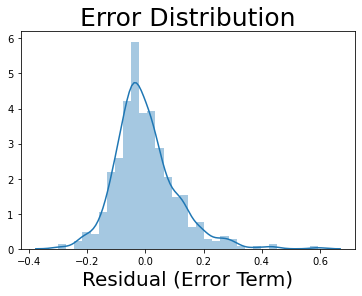

In [109]:
# Linear Regression Assumptions:
# Assumptions of Normally Distributed Error Terms:

y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

In [110]:
#From the above graph it is evident that Error Distribution Is Normally Distributed Across 0, 
# which indicates that our model has handled the assumption of Error Normal Distribution properly.

In [111]:
#Making Predictions on Test Data:

df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])
df_test.head(10)


,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
instant,,,,,,,,,,,,,,,,,,,,,
185,0.100000,0,1,0,0.831783,63.7917,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,0,0,1
536,0.633333,1,0,1,0.901354,59.2083,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,1,0,0
300,0.866667,0,0,0,0.511964,81.2917,0.334206,0.303382,0,0,...,0,0,0,1,0,1,0,0,0,0
222,0.300000,0,0,1,0.881625,42.4167,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
153,0.033333,0,0,0,0.817246,30.5000,0.537414,0.569029,0,0,...,0,0,1,0,0,1,0,0,0,0
405,0.266667,1,0,0,0.256524,56.2083,0.326196,0.438104,0,0,...,0,1,0,0,0,1,0,0,0,0
199,0.566667,0,0,1,0.856704,65.1250,0.372990,0.510354,0,0,...,0,0,0,0,0,0,0,0,0,1
172,0.666667,0,0,1,0.774672,77.0417,0.276724,0.553728,0,0,...,0,0,0,0,0,0,0,1,0,0
513,0.900000,1,1,0,0.814131,67.6250,0.331536,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0


In [112]:
# test target variable:

y_test = df_test.pop('cnt')

In [113]:
# test features:

X_test = df_test

In [114]:

X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'mnth_July', 'mnth_September',
       'season_spring', 'season_summer', 'season_winter', 'weekday_thursday'],
      dtype='object')

In [115]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [116]:
y_pred = lr_model.predict(X_test_new)

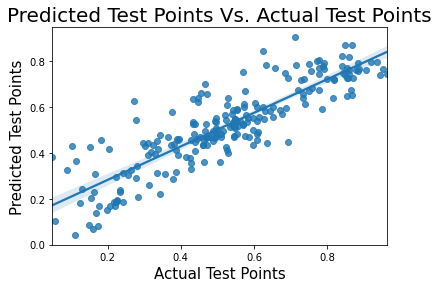

In [117]:
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

In [118]:
# Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

In [119]:
#Generating R-square:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7545955172984424

In [120]:
data = pd.read_csv("day.csv")

#fit regression model
model = LinearRegression()

X, y = data[["season","yr","weathersit","windspeed","atemp"]], data.cnt
model.fit(X, y)

#display adjusted R-squared
1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.7834405054551976

In [121]:
# we got good adjusted R-squared
# It is good sign
# this model can predict well
#Thank You